<a href="https://colab.research.google.com/github/JuliaVazTostes/curso_data_science/blob/master/M%C3%B3dulo_3_Histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histograma

O histograma também é conhecido como sendo um gráfico de distribuição de frequências. Representando essas frequências em formato de barras, a altura de cada barra pode representar tanto a quantidade ou frequência que cada classe de valores ocorre no *dataset*.

Um histograma de valores absolutos, tem no eixo y a quantidade absoluta de ocorrências dos valores de cada classe:

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/histograma_absoluto.png"width="450px"></center>

Já um histograma de dados de proporção, conhecido como histograma de área de unidade, exibe a proporção que cada classe representa no todo:

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/histograma_proporcao.png"width="450px"></center>


Os histogramas fornecem muitas informações ao cientista de dados, pois mostra visualmente a distribuição dos dados relativos a uma determinada variável. Além disso, permite obter informações sobre a centralidade, amplitude e simetria da mesma.

Recomendo assistir a [este vídeo](https://pt.khanacademy.org/math/ap-statistics/quantitative-data-ap/histograms-stem-leaf/v/histograms-intro) ensinando a criar e interpretar um histograma.

## Plotar o histograma

Para exemplificar o gráfico de linhas, vou usar um *dataset* contendo o número de casos (mensal) de dengue para a cidade de Campinas-SP.

Além do número de casos confirmados de dengue, o *dataset* mostra ainda dados relacionados à chuva, temperaturas média, mínima e máxima do município. O período contemplado pelo conjunto de dados é de 1998 a 2015.

In [1]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# importar dados para dataframe
data = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/dengue-dataset.csv"
df = pd.read_csv(data, index_col="data", parse_dates=True)

# ver as 5 primeiras entradas
df.head()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
data,,,,,
1998-01-01,237,179.2,25.7,20.2,28.1
1998-02-01,331,226.3,25.1,20.0,28.0
1998-03-01,562,149.1,24.8,22.4,27.2
1998-04-01,187,46.4,22.7,18.1,26.0
1998-05-01,32,88.3,19.2,15.7,22.9


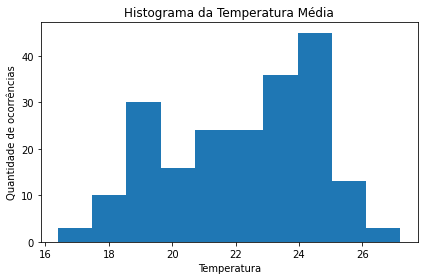

In [2]:
# plotar o histograma da temperatura média
fig, ax = plt.subplots()

df["temperatura-media"].plot(kind="hist", ax=ax)
ax.set_title("Histograma da Temperatura Média")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Temperatura")

plt.tight_layout()

O histograma acima está representando os valores absolutos no eixo y. Para plotar em termos de frequência relativa, acrescenta-se `density=True` dentro da função.

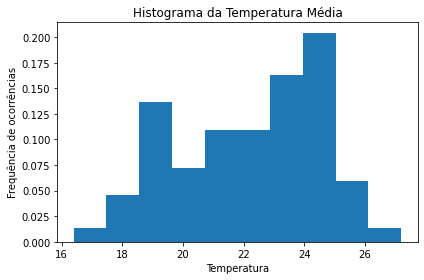

In [3]:
# plotar o histograma da temperatura média
fig, ax = plt.subplots()

df["temperatura-media"].plot(kind="hist", ax=ax, density=True)
ax.set_title("Histograma da Temperatura Média")
ax.set_ylabel("Frequência de ocorrências")
ax.set_xlabel("Temperatura")

plt.tight_layout()

A quantidade de barras é definida por padrão, porém não é fixa. Conseguimos alterar a quantidade de `bins` informando dentro do método de maneira explícita.

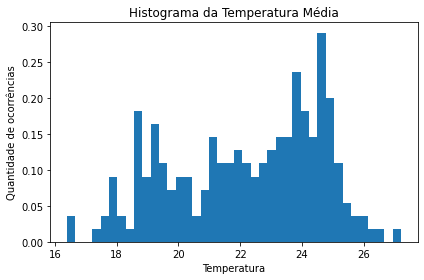

In [4]:
# plotar o histograma da temperatura média
fig, ax = plt.subplots()

df["temperatura-media"].plot(kind="hist", ax=ax, density=True, bins=40)
ax.set_title("Histograma da Temperatura Média")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Temperatura")

plt.tight_layout()

Se você reparar no histograma acima, vai perceber que as os *ticks* no eixo x não estão alinhados com o início/final de cada barra.

Isso pode ser resolvido usando a biblioteca `numpy` para extrair os valores de cada `bin`.

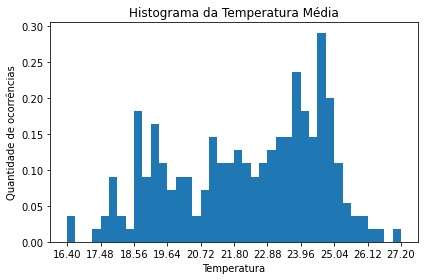

In [5]:
import numpy as np

count, bin_edges = np.histogram(df["temperatura-media"])

# plotar o histograma da temperatura média
fig, ax = plt.subplots()

df["temperatura-media"].plot(kind="hist", ax=ax, density=True, bins=40,
                            xticks=bin_edges)

ax.set_title("Histograma da Temperatura Média")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Temperatura")

plt.tight_layout()